In [3]:
from Bio.Seq import Seq
from Bio.SeqUtils import MeltingTemp as mt


def complement_base(base):
       if base == 'A':
              return 'T'
       elif base == 'T':
              return 'A'
       elif base == 'C':
              return 'G'
       else:
              return 'C'

def reverse_compliment(seq):
    seq_dict = {'A':'T', 'T':'A','C':'G', 'G':'C'}
    reverse_compliment = ''
    for base in seq[::-1]:
        if base == ' ': #if block to clean up the spacing in the data above, if empty space then add an empty space
            reverse_compliment += ' '
        else: #if not empty space look up the dictionary
            reverse_compliment += seq_dict[base]
    return reverse_compliment

#generate sequences
seqs = []
for c1 in "ATCG":
      for c2 in "ATCG":
            for c3 in "ATCG":
                  for c4 in "ATCG":
                        for c5 in "ATCG":
                              for c6 in "ATCG":
                                    for c7 in "ATCG":
                                          for c8 in "ATCG":
                                                seqs.append("".join([c1,c2,c3,c4,c5,c6,c7,c8]))
                                                rdict = {'A':'T', 'T':'A','C':'G', 'G':'C'}
def rc (seq):
    return "".join([
        rdict[c]
        for c in seq
    ][::-1])
forwards = [] 
for s in seqs:
    if rc(s) in forwards:
        pass
    else:
        forwards.append(s)
len(forwards) 

forwards = list(
    filter(
    lambda seq: 15 <= mt.Tm_NN(seq, Mg = 15, Na = 5, saltcorr = 4) <= 17,
        forwards
    )
)
len(forwards)

#CG contents
forwards = [
    seq for seq in forwards 
    if (seq.count("C") + seq.count("G")) / len(seq) == 0.5
]
len(forwards)


2620

In [ ]:
import random
from nupack import *
from tqdm import tqdm

model1 = Model(material='dna', celsius=16, sodium=0.05, magnesium=0.00)
max_unique_seq = []
max_len = 0

r_list = []

while len(r_list) < len(forwards):
    
    
    for r in range(len(forwards)):
        unique_seq = []
        potential_seq = []
        if len(unique_seq) == 0:
            unique_seq.append(forwards[r])
            unique_seq.append(reverse_complement(forwards[r]))
            r_list.append(r)

        r1_list = []
        for a in tqdm(range(len(forwards))):
            
            if len(r1_list) == len(forwards)-1:
                continue
            count = 0
            for b, uni_seq in enumerate(unique_seq):
                if b % 2 ==0:
                    
                    r1 = random.randint(0,len(forwards)-1)
                    if r1 not in r1_list and r1 != r:
                        potential_seq.append(forwards[r1])
                        r1_list.append(r1)

                        dG_comp_pot = pfunc((forwards[r1], reverse_complement(forwards[r1])), model=model1)
                        
                        dG_pot_f_1 = pfunc((forwards[r1], uni_seq), model = model1) #compare dG from possible pair (forward) to the sequences inside unique_seq
                        
                        dG_pot_f_2 = pfunc((forwards[r1], reverse_complement(uni_seq)), model = model1)
                        
                        dG_pot_r_1 = pfunc((reverse_complement(forwards[r1]),uni_seq),model=model1) #compare dG from possible pair (reverse) to the sequences inside unique_seq
                        
                        dG_pot_r_2 = pfunc((reverse_complement(forwards[r1]),reverse_complement(uni_seq)), model=model1)

                        dG_palindromic = pfunc((forwards[r1],forwards[r1]), model=model1)

                        ddG_pot_f_1 = dG_comp_pot[1] - dG_pot_f_1[1]
                        ddG_pot_f_2 = dG_comp_pot[1] - dG_pot_f_2[1]

                        ddG_pot_r_1 = dG_comp_pot[1] - dG_pot_r_1[1]
                        ddG_pot_r_2 = dG_comp_pot[1] - dG_pot_r_2[1]
                        
                        ddG_palindromic = dG_comp_pot[1] - dG_palindromic[1]

                        if ddG_pot_f_1 <= -3.4 and ddG_pot_f_2 <= -3.4 and ddG_pot_r_1 <= -3.4 and ddG_pot_r_2 <= -3.4 and ddG_palindromic <= -2.5:
                            # print(ddG_pot_f_1,',',ddG_pot_f_2,',',ddG_pot_r_1,',',ddG_pot_r_2)
                            count += 2
                        # print(count)
                        if count == len(unique_seq): #why unique_seq cannot more than 4
                            # print(len(unique_seq))
                            
                            count_1 = 0
                            for c, strand in enumerate(unique_seq):
                                
                                if c % 2 ==0:
                                    dG_comp_1 = pfunc((strand, reverse_complement(strand)), model=model1) #compare dG from the sequences inside unique_seq to the possible pair
                                    
                                    dG_forw_1 = pfunc((strand,potential_seq[0]), model=model1) #check forward strand inside unique with forward and reverse in the possible pair
                                    dG_forw_2 = pfunc((strand,reverse_complement(potential_seq[0])),model=model1)
                                    

                                    dG_rev_1 = pfunc((reverse_complement(strand),potential_seq[0]), model=model1) #check reverse strand inside unique with forward and reverse in the possible pair
                                    dG_rev_2 = pfunc((reverse_complement(strand),reverse_complement(forwards[r1])),model=model1)
                                    
                                    

                                    ddG_forw_1 = dG_comp_1[1] - dG_forw_1[1]
                                    ddG_forw_2 = dG_comp_1[1] - dG_forw_2[1]
                                    

                                    ddG_rev_1 = dG_comp_1[1] - dG_rev_1[1]
                                    ddG_rev_2 = dG_comp_1[1] - dG_rev_2[1]
                                    


                                    if ddG_forw_1 <= -3.4 and ddG_forw_2 <= -3.4 and ddG_rev_1 <= -3.4 and ddG_rev_2 <= -3.4:
                                        # print(ddG_forw_1,',',ddG_forw_2,',',ddG_rev_1,',',ddG_rev_2)
                                        count_1 += 2   #why always = 2
                                    
                                    if count_1 == len(unique_seq):
                                        
                                        unique_seq.append(potential_seq[0])
                                        unique_seq.append(reverse_complement(potential_seq[0]))
                                        

                            if c == len(unique_seq)-1:
                                potential_seq = []
                        
        with open('forwards_list_index', 'w') as file:
            for number in r_list:
                file.write(str(number) + ',')
            
        if len(unique_seq) > max_len or len(unique_seq) >= 48:
            max_len = len(unique_seq)
            max_unique_seq = unique_seq[:]
            with open('unique_strands.txt', 'w') as file:
                for i in range(0, len(max_unique_seq), 2):
                    print(max_unique_seq[i])
                    print(max_unique_seq[i+1])
                    file.write(max_unique_seq[i] + '\n')
                    file.write(max_unique_seq[i+1] + '\n')
            print(len(max_unique_seq))        

In [2]:
### Check dGs for spurious strands ###

from nupack import *
import nupack
model1 = Model(material='dna', celsius=16, magnesium=0.00, sodium=0.05) #salts unit here is in M, we want mM 10mM Mg, 0 mM Na (Range:Na [0.05,1.1] ; Mg [0.0,0.2])

strands = """
AATCAGGC
GCCTGATT
TAGTTGCC
""".split()

sequences = """
AATCAGGC
GCCTGATT
TAGTTGCC
""".split()

def reverse_compliment(seq):
    seq_dict = {'A':'T', 'T':'A','C':'G', 'G':'C'}
    reverse_compliment = ''
    for base in seq[::-1]:
        if base == ' ': #if block to clean up the spacing in the data above, if empty space then add an empty space
            reverse_compliment += ' '
        else: #if not empty space look up the dictionary
            reverse_compliment += seq_dict[base]
    return reverse_compliment

dGs = []
for strd in strands:
    for seq in sequences:
        # if seq == strd: #or seq == reverse_compliment(strd):
        #     continue
        pair = [strd, seq]
        result = mfe(strands=[strd, seq], model=model1)
        # sampled_structures = sample(strands=[strd, seq], num_sample=2, model=model1)
        dGs.append([result[0],strd, seq ]) #append strand + sequence along with dG
        
# Print the ΔG values with orders and the strand + each sequence
for i, dG in enumerate(dGs, start = 1):
    print(f'{i}\t {dG[0]} \t {dG[1]}+{dG[2]}')
    print()

1	 StructureEnergy('.....(.(+.....).)', energy=-4.60, stack_energy=-4.34) 	 AATCAGGC+AATCAGGC

2	 StructureEnergy('((((((((+))))))))', energy=-10.92, stack_energy=-10.92) 	 AATCAGGC+GCCTGATT

3	 StructureEnergy('.....(((+.....)))', energy=-6.45, stack_energy=-6.21) 	 AATCAGGC+TAGTTGCC

4	 StructureEnergy('((((((((+))))))))', energy=-10.92, stack_energy=-10.92) 	 GCCTGATT+AATCAGGC

5	 StructureEnergy('..(.(...+..).)...', energy=-4.74, stack_energy=-4.30) 	 GCCTGATT+GCCTGATT

6	 StructureEnergy('..((....+.)).....', energy=-5.02, stack_energy=-4.47) 	 GCCTGATT+TAGTTGCC

7	 StructureEnergy('.....(((+.....)))', energy=-6.45, stack_energy=-6.21) 	 TAGTTGCC+AATCAGGC

8	 StructureEnergy('.((.....+..))....', energy=-5.02, stack_energy=-4.47) 	 TAGTTGCC+GCCTGATT

9	 StructureEnergy('.....((.+.....)).', energy=-5.95, stack_energy=-5.31) 	 TAGTTGCC+TAGTTGCC



4. CGTTGAAG+ACACCATG
[Structure('.(.((...+.)).)...'), Structure('.(......+.)......')]
StructureEnergy('....(...+.)......', energy=-5.08, stack_energy=-4.75)


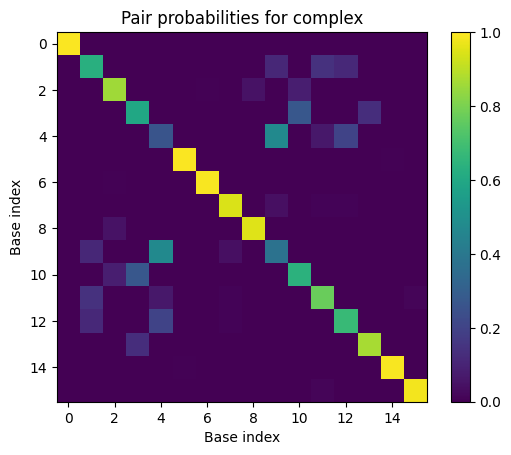

5. CGTTGAAG+CATGGTGT
[Structure('......(.+(.....))'), Structure('.....(..+(.....))')]
StructureEnergy('....(...+).......', energy=-3.70, stack_energy=-3.43)


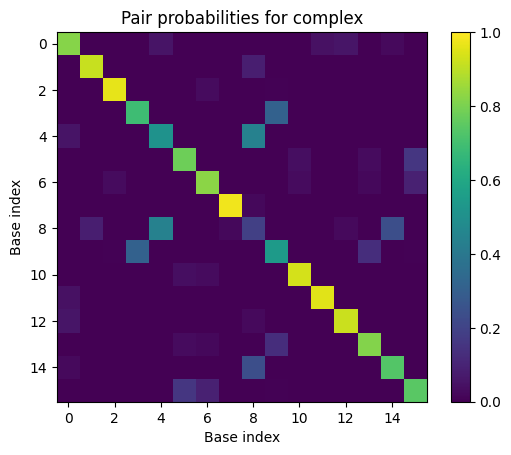

6. CGTTGAAG+CATTCGAC
[Structure('((......+....))..'), Structure('((.((...+))..))..')]
StructureEnergy('((.((...+))..))..', energy=-5.82, stack_energy=-5.64)


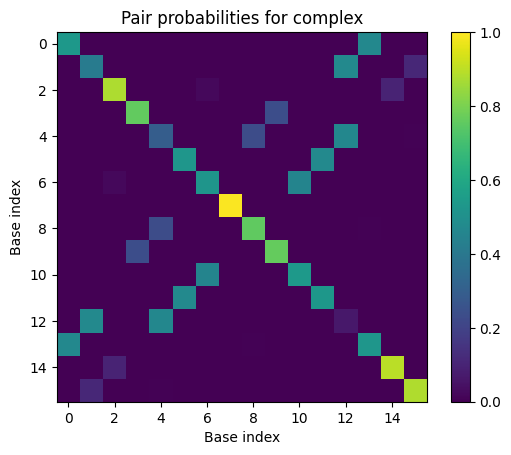

7. CGTTGAAG+GTCGAATG
[Structure('((......+..))....'), Structure('(((...).+..))....')]
StructureEnergy('((......+..))....', energy=-5.82, stack_energy=-5.44)


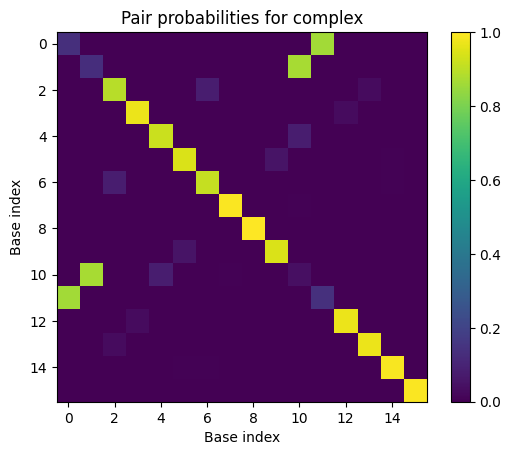

8. CGTTGAAG+TAGCCACA
[Structure('...((...+....))..'), Structure('....(...+....)...')]
StructureEnergy('....(...+......).', energy=-5.08, stack_energy=-4.75)


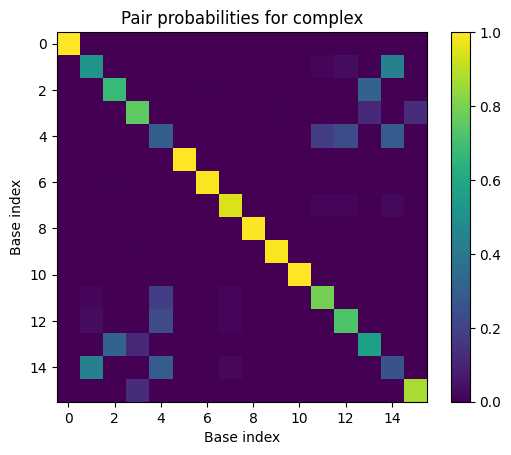

9. CGTTGAAG+TGTGGCTA
[Structure('.(......+.....)..'), Structure('.......(+.....)..')]
StructureEnergy('....(...+.....)..', energy=-4.53, stack_energy=-4.12)


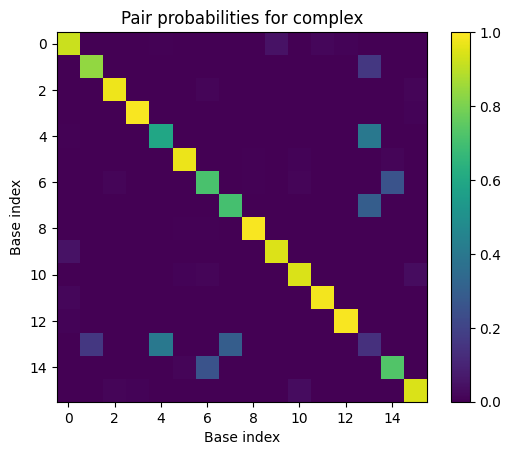

In [2]:
### Check Probability Matrix of Spurious Strands ###
from nupack import *
import nupack
import matplotlib.pyplot as plt
import numpy as np
model1 = Model(material='dna', celsius=16, sodium=0.05, magnesium= 0.01)


a = 'CGTTGAAG'

strand_sequences = """
CGTTGAAG
CTTCAACG
ACACCATG
CATGGTGT
CATTCGAC
GTCGAATG
TAGCCACA
TGTGGCTA
CGTTGAAG
CTTCAACG
""".split()


def plot_probability_matrix(probability_matrix):
    plt.imshow(probability_matrix.to_array())
    plt.xlabel('Base index')
    plt.ylabel('Base index')
    plt.title('Pair probabilities for complex')
    plt.colorbar()
    plt.clim(0,1)
    plt.show()

for i, strand in enumerate(strand_sequences, start = 2):
    if strand == a or strand == reverse_complement(a):
        continue
    probability_matrix = pairs(strands=[a, strand], model=model1)
    mfe_result = mfe(strands=[a, strand], model=model1)
    sampled_structures = sample(strands=[a, strand], num_sample=2, model=model1)
    print(f'{i}. {a}+{strand}')
    print(sampled_structures)
    print(mfe_result[0])
    plot_probability_matrix(probability_matrix)

